# Tokenisation of Text into sentences
Code from [Mastering Natural Langiage Processing with Python](https://www.packtpub.com/big-data-and-business-intelligence/mastering-natural-language-processing-python). 

In [1]:
import nltk
# nltk.download()

In [2]:
text="Welcome readers. I hope you find it interesting. please fo reply."

In [3]:
from nltk.tokenize import sent_tokenize

In [4]:
sent_tokenize(text)

['Welcome readers.', 'I hope you find it interesting.', 'please fo reply.']

# For large number of senteces try this instead

In [5]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

In [6]:
text='Hello everyone. Hope you are all fine and doing well. Hope that you will find the book interesting.'

In [7]:
tokenizer.tokenize(text)

['Hello everyone.',
 'Hope you are all fine and doing well.',
 'Hope that you will find the book interesting.']

# For splitting sentences into words
This can be done using the `word_tokenize` as per below:

In [8]:
text=nltk.word_tokenize("PeirreVinken, 59 years old, will join as a nonexecutive director on Nov. 29.")

In [9]:
print(text)

['PeirreVinken', ',', '59', 'years', 'old', ',', 'will', 'join', 'as', 'a', 'nonexecutive', 'director', 'on', 'Nov.', '29', '.']


In [10]:
r=input("Please provide some imput text:")

Please provide some imput text:Hello, my name is Faleh! How are you? What is your name?


In [11]:
from nltk import word_tokenize
print("The length of this word is", len(word_tokenize(r)),"words.")

The length of this word is 16 words.


# What about other tokenizers
There is the `TreeBankTokenizer` which tokenises according to Penn Treebank Corpus conventions.

In [12]:
from nltk.tokenize import TreebankWordTokenizer

In [13]:
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize("Have a nice day. I hope you find the book interesting"))

['Have', 'a', 'nice', 'day.', 'I', 'hope', 'you', 'find', 'the', 'book', 'interesting']


In [14]:
text=nltk.word_tokenize(" Don't hesitate to ask questions")
print(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


# What about using regular expressions
Regular expressions can be used to split text based on punctuation chars. Luckily, we won't need RegExs just yet:

In [15]:
from nltk.tokenize import WordPunctTokenizer
tokenizer=WordPunctTokenizer()
print(tokenizer.tokenize(" Don't hesitate to ask questions"))

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']


But if you want to use regular expressions:

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w']+")
print(tokenizer.tokenize("Don't hesitate to ask questions"))


["Don't", 'hesitate', 'to', 'ask', 'questions']


Instead of instantiating a class, here is an alternative way to tokenize with regexs:

In [17]:
from nltk.tokenize import regexp_tokenize
sent="Don't hesitate to ask questions"
print(regexp_tokenize(sent, pattern='\w+|\$[\d\.]+|\S+'))

['Don', "'t", 'hesitate', 'to', 'ask', 'questions']


And here is how we can 

In [18]:
tokenizer=RegexpTokenizer('\s+',gaps=True)
print(tokenizer.tokenize("Don't hesitate to ask questions"))

["Don't", 'hesitate', 'to', 'ask', 'questions']


How about selecting words with a capital letter:

In [19]:
sent=" She secured 90.56 % in class X . She is a meritorious student"
capt = RegexpTokenizer('[A-Z]\w+')
print(capt.tokenize(sent))


['She', 'She']


## Other RegeEx tokenizers
And what about using predefined regexs?

In [20]:
sent=" She secured 90.56 % in class X . She is a meritorious student"
from nltk.tokenize import BlanklineTokenizer
print(BlanklineTokenizer().tokenize(sent))

[' She secured 90.56 % in class X . She is a meritorious student']


Tokenisation using a white_space tokenizer:

In [21]:
sent=" She secured 90.56 % in class X . She is a meritorious student"
from nltk.tokenize import WhitespaceTokenizer
print(WhitespaceTokenizer().tokenize(sent))

['She', 'secured', '90.56', '%', 'in', 'class', 'X', '.', 'She', 'is', 'a', 'meritorious', 'student']


The split method can also be used to specify a white_space character or anything else:

In [22]:
sent= "She secured 90.56 % in class X. She is a meritorious student"
print(sent.split())     # Notice that these two...
print(sent.split(' '))  # ...are equivalent
sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(sent.split('\n'))


['She', 'secured', '90.56', '%', 'in', 'class', 'X.', 'She', 'is', 'a', 'meritorious', 'student']
['She', 'secured', '90.56', '%', 'in', 'class', 'X.', 'She', 'is', 'a', 'meritorious', 'student']
[' She secured 90.56 % in class X ', '. She is a meritorious student', '']


The `SpaceTokenizer` works in a very similar way to `sent.split(' ')`

In [23]:
sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
from nltk.tokenize import SpaceTokenizer
print(SpaceTokenizer().tokenize(sent))

['', 'She', 'secured', '90.56', '%', 'in', 'class', 'X', '\n.', 'She', 'is', 'a', 'meritorious', 'student\n']


What if all we want it to tokenize words into lines:

In [24]:
from nltk.tokenize import BlanklineTokenizer
sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(BlanklineTokenizer().tokenize(sent))
from nltk.tokenize import LineTokenizer
print(LineTokenizer(blanklines='keep').tokenize(sent))
print(LineTokenizer(blanklines='discard').tokenize(sent))

[' She secured 90.56 % in class X \n. She is a meritorious student\n']
[' She secured 90.56 % in class X ', '. She is a meritorious student']
[' She secured 90.56 % in class X ', '. She is a meritorious student']


# Normalisation

It is the process of: 
1. eliminating punctuation, 
2. converting the entire text into lowercase or uppercase, 
3. changing numbers into words, 
4. expanding abbreviations, 
5. canonicalisation of text 
and so on.

Let's start with punctuation:

In [25]:
import re
import string
text=[" It is a pleasant evening.","Guests, who came from US arrived at the venue","Food was tasty."]
from nltk.tokenize import word_tokenize
tokenized_docs=[word_tokenize(doc) for doc in text]
x=re.compile('[%s]' % re.escape(string.punctuation))
tokenized_docs_no_punctuation = []
for review in tokenized_docs:
    new_review = []
    for token in review: 
        new_token = x.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    tokenized_docs_no_punctuation.append(new_review)	
print(tokenized_docs_no_punctuation)

[['It', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']]


Let's convert text to lowercase and uppercase:

In [26]:
text='HARdWork IS KEy to SUCCESS'
print(text.lower())
print(text.upper())


hardwork is key to success
HARDWORK IS KEY TO SUCCESS


## Stopwords
Also, another important part is stopwords. Stopwords are words that need to be filtered out as they appear way too often and do not provide too much useful information:

In [27]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
words=["Don't", 'hesitate','to','ask','questions']
print([word for word in words if word not in stops])

["Don't", 'hesitate', 'ask', 'questions']


In [28]:
# For other languages:
print(stopwords.fileids())

['danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'kazakh', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [29]:
# Lets calculate stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [30]:
def para_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    para = [w for w in text if w.lower() not in stopwords]
    return len(para) / len(text)

In [31]:
print(para_fraction(nltk.corpus.reuters.words()))

0.735240435097661


In [32]:
print(para_fraction(nltk.corpus.inaugural.words()))

0.5228599855902837


## Substituting and correcting tokens

In [33]:
# Using regular expressions

In [34]:
import re
replacement_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'ain\'t', 'is not'),
(r'(\w+)\'ll', '\g<1> will'),
(r'(\w+)n\'t', '\g<1> not'),
(r'(\w+)\'ve', '\g<1> have'),
(r'(\w+)\'s', '\g<1> is'),
(r'(\w+)\'re', '\g<1> are'),
(r'(\w+)\'d', '\g<1> would')
 ]

class RegexpReplacer(object):

   def __init__(self, patterns=replacement_patterns):

      # Fixed this line - "patterns", not "pattern"
      self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]

   def replace(self, text):
      s = text
      for (pattern, repl) in self.patterns:
          (s, count) = re.subn(pattern, repl, s)

      # Fixed indentation here
      return s


rep=RegexpReplacer()
print(rep.replace("can't is a contradicton"))

cannot is a contradicton


In [35]:
replacer= RegexpReplacer()
replacer.replace("Don't hesitate to ask questions")
print(replacer.replace("She must've gone to the market but she didn't go"))


She must have gone to the market but she did not go


In [36]:
# Substitution can take place before tokenisation
replacer=RegexpReplacer()
word_tokenize("Don't hesitate to ask questions")
print(word_tokenize(replacer.replace("Don't hesitate to ask questions")))

['Do', 'not', 'hesitate', 'to', 'ask', 'questions']


## Delete repeating characters
Have a look at [this](https://github.com/japerk/nltk3-cookbook/blob/master/replacers.py)

In [37]:
from nltk.corpus import wordnet
class RepeatReplacer(object):
	""" Removes repeating characters until a valid word is found.
	>>> replacer = RepeatReplacer()
	>>> replacer.replace('looooove')
	'love'
	>>> replacer.replace('oooooh')
	'ooh'
	>>> replacer.replace('goose')
	'goose'
	"""
	def __init__(self):
		self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
		self.repl = r'\1\2\3'

	def replace(self, word):
		if wordnet.synsets(word):
			return word
		
		repl_word = self.repeat_regexp.sub(self.repl, word)
		
		if repl_word != word:
			return self.replace(repl_word)
		else:
			return repl_word

In [38]:
replacer=RepeatReplacer()
print(replacer.replace('lotttt'))
print(replacer.replace('ohhhhh'))
print(replacer.replace('ooohhhhh'))

lot
oh
ooh


## Replacing words witht heir synonyms

In [39]:
class WordReplacer(object):
	""" WordReplacer that replaces a given word with a word from the word_map,
	or if the word isn't found, returns the word as is.
	>>> replacer = WordReplacer({'bday': 'birthday'})
	>>> replacer.replace('bday')
	'birthday'
	>>> replacer.replace('happy')
	'happy'
	"""
	def __init__(self, word_map):
		self.word_map = word_map
	
	def replace(self, word):
		return self.word_map.get(word, word)

In [40]:
replacer=WordReplacer({'congrats':'congratulations'})
print(replacer.replace('congrats'))
print(replacer.replace('maths'))

congratulations
maths


# Zipfs Law
It states that the frequency of a token in a text is directly proportional to its rank or position in the sorted list.

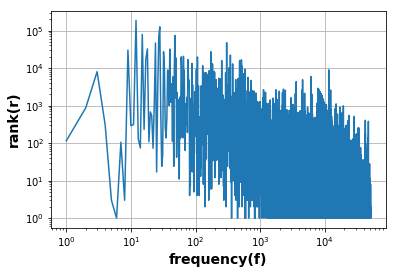

In [41]:
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

fd = FreqDist()
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd[word] += 1

ranks = []
freqs = []
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

plt.loglog(ranks,freqs)
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
fig = plt.figure(figsize=(40,20), dpi= 80, facecolor='w', edgecolor='k')
fig

## Similarity Measures
Many similarity measures can be used to quantify the similarity between words, phrases or bigger chanks of text. The `nltk.metrics` lib is used for this task:

In [44]:
from __future__ import print_function
from nltk.metrics import *
training='PERSON OTHER PERSON OTHER OTHER ORGANIZATION'.split()
testing='PERSON OTHER OTHER OTHER OTHER OTHER'.split()
print('Accuracy:' + str(accuracy(training,testing)))
trainset=set(training)
testset=set(testing)
precision(trainset,testset)
print('Recall:' + str(recall(trainset,testset)))
print('F_measure:' + str(f_measure(trainset,testset)))

Accuracy:0.6666666666666666
Recall:0.6666666666666666
F_measure:0.8


### Edit distance
Minimum number of insertions, deletions or substitutions necessary to convert one word into another.

In [46]:
from nltk.metrics import *
print(edit_distance("relate","relation"))
print(edit_distance("suggestion","calculation"))


3
7


## Jaccard Coefficient
A measure of the overlap between two sets.

In [48]:
X=set([10,20,30,40])
Y=set([20,30,60])
print(jaccard_distance(X,Y))

0.6


## Other Similarity algorithms
The binary distance which returns 0 if the two strings are exactly the same and 1 if they are not.

In [58]:
X = set([10,20,30,40])
Y= set([30,50,70])
print(binary_distance(X, Y))

1.0


Or the masi distance, which is based on partial agreement when multiple labels are present:

In [62]:
X=set([10,20,30,40])
Y=set([30,50,70])
print(masi_distance(X,Y))

0.275
